In [63]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [64]:
feature_extracting_cleaned = pd.read_csv('C:/Users/mayuo/OneDrive/Documents/Machine Learning by Abraham/interview_take_home/data/clusted_df.csv')
feature_extracting_cleaned.drop(columns= 'Unnamed: 0', inplace=True)
feature_extracting_cleaned.head(3)

,ps_cluster,market_segment,sub_type,ps_weekday_working_usage,ps_weekday_nonworking_usage,ps_weekend_usage,ps_doc_average_file_size,ps_doc_average_openseconds,generic_email,count_camera_make,...,traditional_art_score,commercial_design_score,design_complexity_score,social_media_score,total_visual_usage,total_design_illustration_usage,total_adobe_activity_score,video_media_creation_score,design_engagement_score,cluster_name
0,0,COMMERCIAL,Phtoshp Lightrm Bndl,0.621516,0.000000,0.378484,Small,Long,True,0.005525,...,0.005525,0.0,0.001842,0.016575,0.276243,0.027624,0.042357,0.0,0.0,occasional_taskers
1,0,COMMERCIAL,Phtoshp Lightrm Bndl,0.719328,0.014286,0.266387,Medium,Long,True,0.005525,...,0.000000,0.0,0.000000,0.000000,0.151934,0.151934,0.012891,0.0,0.0,occasional_taskers
2,0,COMMERCIAL,Phtoshp Lightrm Bndl,0.566488,0.244484,0.189028,Small,Short,True,0.011050,...,0.000000,0.0,0.000000,0.000000,0.831492,0.279006,0.029466,0.0,0.0,occasional_taskers


In [65]:
X = feature_extracting_cleaned.drop(columns=['ps_cluster', 'cluster_name'])  # drop target column
y = feature_extracting_cleaned['cluster_name']  # target variable

In [66]:
feature_extracting_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10276 entries, 0 to 10275
Data columns (total 33 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ps_cluster                       10276 non-null  int64  
 1   market_segment                   10276 non-null  object 
 2   sub_type                         10276 non-null  object 
 3   ps_weekday_working_usage         10276 non-null  float64
 4   ps_weekday_nonworking_usage      10276 non-null  float64
 5   ps_weekend_usage                 10276 non-null  float64
 6   ps_doc_average_file_size         10276 non-null  object 
 7   ps_doc_average_openseconds       10276 non-null  object 
 8   generic_email                    10276 non-null  bool   
 9   count_camera_make                10276 non-null  float64
 10  count_camera_model               10276 non-null  float64
 11  total_video_usage                10276 non-null  float64
 12  total_3d_usage    

In [67]:
# Categorical columns to be one-hot encoded
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

In [68]:
# Numerical columns to be scaled
numerical_cols = X.select_dtypes(include=['float64']).columns.tolist()

In [69]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),  # Scaling numerical features
        ('cat', OneHotEncoder(), categorical_cols)   # One-hot encoding categorical features
    ])

# Build a pipeline with preprocessing and classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [70]:
# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model on the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['ps_weekday_working_usage',
                                                   'ps_weekday_nonworking_usage',
                                                   'ps_weekend_usage',
                                                   'count_camera_make',
                                                   'count_camera_model',
                                                   'total_video_usage',
                                                   'total_3d_usage',
                                                   'num_used_products',
                                                   'camera_usage_ratio',
                                                   'digital_design_score',
                                                   'visual_media_score',
                                                   'traditional_art_score...
                                                   'video_media_creation_score',
                                                   'design_engagement_score']),
                                                 ('cat', OneHotEncoder(),
                                                  ['market_segment', 'sub_type',
                                                   'ps_doc_average_file_size',
                                                   'ps_doc_average_openseconds',
                                                   'machine_ps_max_numprocessors',
                                                   'operating_system',
                                                   'most_used_products',
                                                   'memory_category',
                                                   'machine_ps_speed_bin',
                                                   'usage_profile'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [71]:
# Predict on the test set
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

Training Classification Report:
                      precision    recall  f1-score   support

creative_powerhouses       1.00      1.00      1.00       707
engaged_all_rounders       1.00      1.00      1.00      1021
multimedia_explorers       1.00      1.00      1.00       355
  occasional_taskers       1.00      1.00      1.00      3429
   weekend_explorers       1.00      1.00      1.00      2708

            accuracy                           1.00      8220
           macro avg       1.00      1.00      1.00      8220
        weighted avg       1.00      1.00      1.00      8220

Training Confusion Matrix:


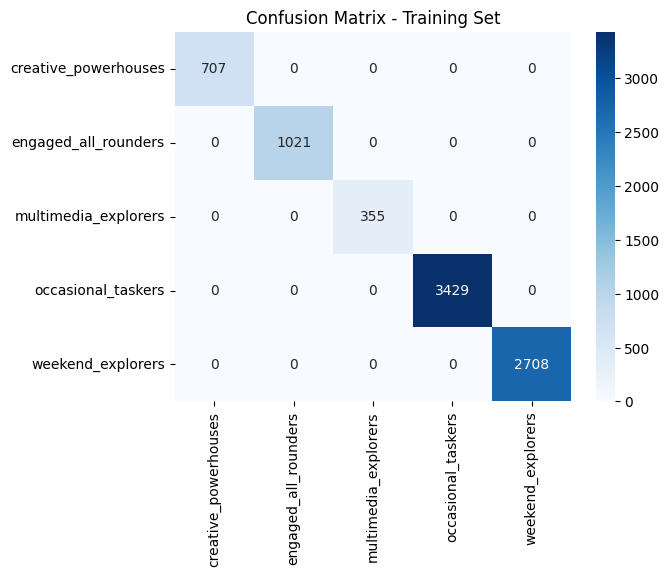

Testing Classification Report:
                      precision    recall  f1-score   support

creative_powerhouses       0.91      0.89      0.90       175
engaged_all_rounders       0.92      0.86      0.89       243
multimedia_explorers       0.96      0.79      0.87        90
  occasional_taskers       0.95      0.98      0.97       871
   weekend_explorers       0.97      0.97      0.97       677

            accuracy                           0.95      2056
           macro avg       0.94      0.90      0.92      2056
        weighted avg       0.95      0.95      0.95      2056

Testing Confusion Matrix:


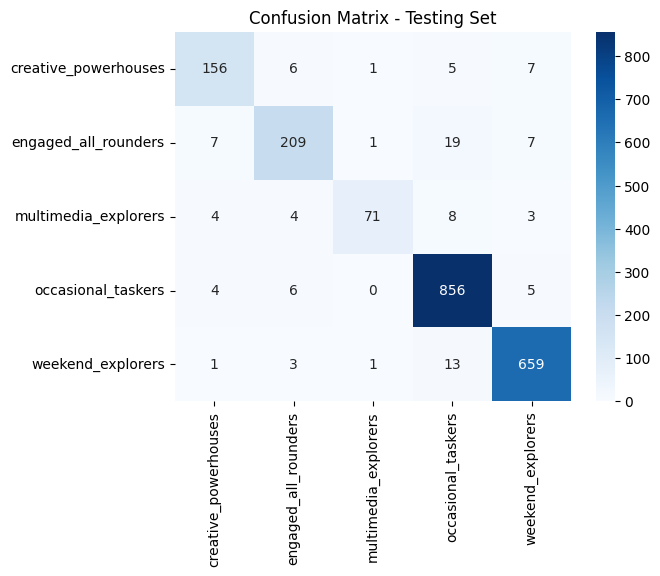

In [72]:
# Classification report and confusion matrix for training set
print("Training Classification Report:")
print(classification_report(y_train, y_train_pred))

print("Training Confusion Matrix:")
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt='d', cmap='Blues', xticklabels=pipeline.classes_, yticklabels=pipeline.classes_)
plt.title('Confusion Matrix - Training Set')
plt.show()

# Classification report and confusion matrix for testing set
print("Testing Classification Report:")
print(classification_report(y_test, y_test_pred))

print("Testing Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues', xticklabels=pipeline.classes_, yticklabels=pipeline.classes_)
plt.title('Confusion Matrix - Testing Set')
plt.show()

In [73]:
y.value_counts()

cluster_name
occasional_taskers      4300
weekend_explorers       3385
engaged_all_rounders    1264
creative_powerhouses     882
multimedia_explorers     445
Name: count, dtype: int64

In [74]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# Encoding the target variable (y) labels into numeric values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Define classifiers to try
classifiers = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'Extra Trees': ExtraTreesClassifier(random_state=42),
    'LightGBM': lgb.LGBMClassifier(learning_rate=0.05)
}

# Preprocessor for scaling numerical and encoding categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),  # Scaling numerical features
        ('cat', OneHotEncoder(), categorical_cols)   # One-hot encoding categorical features
    ])

# Loop through the classifiers, apply the pipeline and print the classification reports
for name, classifier in classifiers.items():
    print(f"\n{'='*50}\n{name} Classifier")
    
    # Build pipeline with preprocessing and classifier
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])
    
    # Fit the model on the training data
    pipeline.fit(X_train, y_train)
    
    # Predict on train and test data
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)
    
    # Print classification reports
    print(f"Training Classification Report for {name}:\n")
    print(classification_report(y_train, y_train_pred, target_names=label_encoder.classes_))
    
    print(f"Testing Classification Report for {name}:\n")
    print(classification_report(y_test, y_test_pred, target_names=label_encoder.classes_))

    print(f"{'='*50}")



Random Forest Classifier
Training Classification Report for Random Forest:

                      precision    recall  f1-score   support

creative_powerhouses       1.00      1.00      1.00       707
engaged_all_rounders       1.00      1.00      1.00      1021
multimedia_explorers       1.00      1.00      1.00       355
  occasional_taskers       1.00      1.00      1.00      3429
   weekend_explorers       1.00      1.00      1.00      2708

            accuracy                           1.00      8220
           macro avg       1.00      1.00      1.00      8220
        weighted avg       1.00      1.00      1.00      8220

Testing Classification Report for Random Forest:

                      precision    recall  f1-score   support

creative_powerhouses       0.91      0.89      0.90       175
engaged_all_rounders       0.92      0.86      0.89       243
multimedia_explorers       0.96      0.79      0.87        90
  occasional_taskers       0.95      0.98      0.97       871
 

- I am going to go with XGBclassifier. and tune and perform smote 

In [75]:
import numpy as np
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# First preprocess the data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

In [93]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_preprocessed, y_train)

In [121]:
# Initialize XGBoost with the same carefully selected parameters
xgb = XGBClassifier(
    n_estimators=200,      
    max_depth=3,           
    learning_rate=0.1,     
    min_child_weight=2,    
    subsample=0.6,         
    colsample_bytree=0.6,  
    random_state=42
)

xgb.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.6,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=2,
              missing=nan, monotone_constraints='()', n_estimators=200,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=42, reg_alpha=0, ...)

In [122]:
# Make predictions
y_train_pred = xgb.predict(X_train_preprocessed)
y_test_pred = xgb.predict(X_test_preprocessed)

# Print classification reports
print("\nTraining Classification Report:")
print(classification_report(y_train, y_train_pred, target_names=label_encoder.classes_))

print("\nTesting Classification Report:")
print(classification_report(y_test, y_test_pred, target_names=label_encoder.classes_))


Training Classification Report:
                      precision    recall  f1-score   support

creative_powerhouses       0.99      1.00      0.99       707
engaged_all_rounders       0.97      0.99      0.98      1021
multimedia_explorers       1.00      1.00      1.00       355
  occasional_taskers       1.00      0.99      0.99      3429
   weekend_explorers       1.00      1.00      1.00      2708

            accuracy                           0.99      8220
           macro avg       0.99      1.00      0.99      8220
        weighted avg       0.99      0.99      0.99      8220


Testing Classification Report:
                      precision    recall  f1-score   support

creative_powerhouses       0.92      0.97      0.94       175
engaged_all_rounders       0.93      0.95      0.94       243
multimedia_explorers       0.96      0.97      0.96        90
  occasional_taskers       0.99      0.97      0.98       871
   weekend_explorers       0.99      0.98      0.98       677



In [155]:
pd.DataFrame(y_train_resampled).value_counts()

0
0    3429
1    3429
2    3429
3    3429
4    3429
Name: count, dtype: int64

In [156]:
def get_feature_names(column_transformer, feature_names):
    output_features = []

    for name, transformer, columns in column_transformer.transformers:
        if transformer == 'drop':
            continue
        elif transformer == 'passthrough':
            output_features.extend(feature_names[columns])
        elif hasattr(transformer, 'get_feature_names_out'):
            transformed_features = transformer.get_feature_names_out(columns)
            output_features.extend(transformed_features)
        else:
            output_features.extend(columns)
    
    return output_features


In [157]:
# Fit preprocessor on training data
preprocessor.fit(X_train)

# Extract feature names after preprocessing
numerical_cols = numerical_cols  # Original numerical columns
categorical_cols_encoded = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
feature_names = list(numerical_cols) + list(categorical_cols_encoded)

print("Final feature names after preprocessing:", feature_names)


Final feature names after preprocessing: ['ps_weekday_working_usage', 'ps_weekday_nonworking_usage', 'ps_weekend_usage', 'count_camera_make', 'count_camera_model', 'total_video_usage', 'total_3d_usage', 'num_used_products', 'camera_usage_ratio', 'digital_design_score', 'visual_media_score', 'traditional_art_score', 'commercial_design_score', 'design_complexity_score', 'social_media_score', 'total_visual_usage', 'total_design_illustration_usage', 'total_adobe_activity_score', 'video_media_creation_score', 'design_engagement_score', 'market_segment_COMMERCIAL', 'market_segment_EDUCATION', 'sub_type_Creative Cloud', 'sub_type_Creative Cloud Indiv', 'sub_type_Others', 'sub_type_Phtoshp Lightrm Bndl', 'ps_doc_average_file_size_Large', 'ps_doc_average_file_size_Medium', 'ps_doc_average_file_size_Small', 'ps_doc_average_openseconds_Long', 'ps_doc_average_openseconds_Medium', 'ps_doc_average_openseconds_Short', 'machine_ps_max_numprocessors_High', 'machine_ps_max_numprocessors_Low', 'machine_p

In [158]:
# Ensure preprocessed data aligns with feature names
X_train_preprocessed = preprocessor.transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Fit the model
xgb.fit(X_train_resampled, y_train_resampled)

# Check feature importance using the correct feature names
xgb_feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': xgb.feature_importances_
}).sort_values(by='importance', ascending=False)

print(xgb_feature_importance)


                                feature  importance
18           video_media_creation_score    0.112521
13              design_complexity_score    0.082002
38            most_used_products_Others    0.060883
0              ps_weekday_working_usage    0.060334
19              design_engagement_score    0.055985
25        sub_type_Phtoshp Lightrm Bndl    0.054093
12              commercial_design_score    0.046042
17           total_adobe_activity_score    0.043912
15                   total_visual_usage    0.040252
2                      ps_weekend_usage    0.040091
7                     num_used_products    0.037816
41         most_used_products_photoshop    0.037037
39           most_used_products_acrobat    0.036553
9                  digital_design_score    0.035584
10                   visual_media_score    0.031839
14                   social_media_score    0.026567
16      total_design_illustration_usage    0.025675
40         most_used_products_lightroom    0.018211
1           

In [185]:
import shap
explainer = shap.TreeExplainer(xgb)

In [186]:
shap_values = explainer.shap_values(X_test_preprocessed)
print(f"SHAP values shape: {shap_values.shape}")

SHAP values shape: (2056, 54, 5)


In [201]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_shap_for_class(class_idx, shap_values, X_data, feature_names, label_encoder):
    """
    Generate both Feature Importance and SHAP Summary Plot for a given class index.

    Parameters:
    - class_idx: The index of the class to analyze.
    - shap_values: The SHAP values from the model (shape: [num_samples, num_features, num_classes]).
    - X_data: The preprocessed test data (features).
    - feature_names: List of feature names.
    - label_encoder: The label encoder used to encode class labels.

    Returns:
    - A bar plot for Feature Importance and an interactive SHAP summary plot.
    """
    # Initialize JavaScript for interactive SHAP plots (if not done already)
    shap.initjs()

    # Get the class name using label encoder
    class_name = label_encoder.classes_[class_idx]  # Get class name

    # Get SHAP values for the chosen class
    class_shap_values = shap_values[:, :, class_idx]

    # ------------------- Feature Importance Plot ---------------------
    # Calculate mean absolute SHAP values for each feature
    mean_shap_values = np.abs(class_shap_values).mean(axis=0)

    # Create a DataFrame to store feature importance
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Mean SHAP Importance': mean_shap_values
    })

    # Sort features by importance (descending)
    feature_importance_df = feature_importance_df.sort_values(by='Mean SHAP Importance', ascending=False)

    # Display the top 10 most important features for the selected class
    print(f"Feature Importance for Class: {class_name}")
    print(feature_importance_df.head(10))

    # Plot Feature Importance
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance_df['Feature'][:10], feature_importance_df['Mean SHAP Importance'][:10])
    plt.xlabel('Mean Absolute SHAP Value')
    plt.ylabel('Feature')
    plt.title(f'Top 10 Features by SHAP Importance for Class: {class_name}')
    plt.gca().invert_yaxis()  # To show the most important features on top
    plt.show()

    # ------------------- Interactive SHAP Summary Plot ---------------------
    # Display message for clarity
    print(f'SHAP Summary Plot for {class_name}')

    # Generate the SHAP summary plot for the selected class
    shap.summary_plot(class_shap_values, X_data, feature_names=feature_names, plot_type="dot")


Feature Importance for Class: engaged_all_rounders
                       Feature  Mean SHAP Importance
19     design_engagement_score              2.260504
17  total_adobe_activity_score              1.585324
7            num_used_products              0.699007
0     ps_weekday_working_usage              0.280448
12     commercial_design_score              0.224656
39  most_used_products_acrobat              0.185056
2             ps_weekend_usage              0.153528
9         digital_design_score              0.126200
18  video_media_creation_score              0.114003
13     design_complexity_score              0.109419


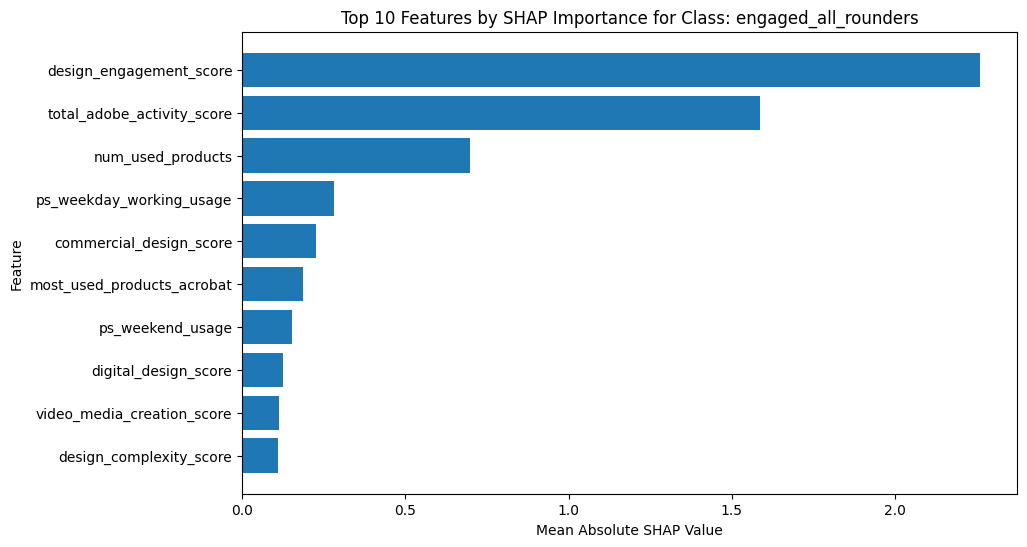

SHAP Summary Plot for engaged_all_rounders


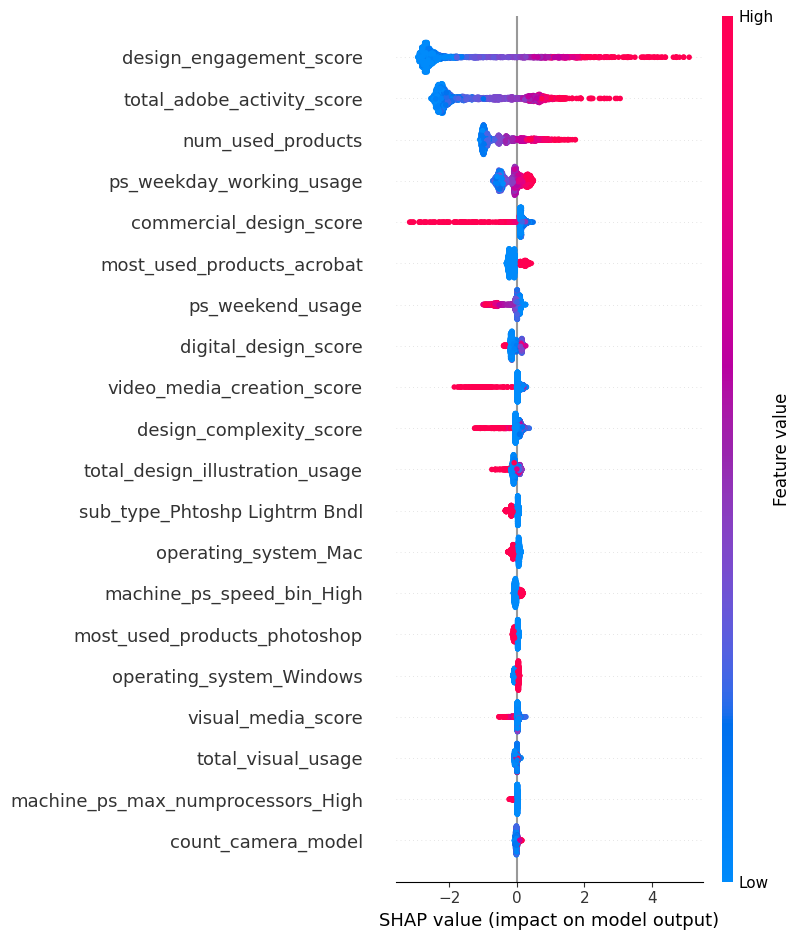

In [216]:

class_idx = 1  # Choose the class index you want to analyze
plot_shap_for_class(class_idx, shap_values, X_test_preprocessed, feature_names, label_encoder)
